# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = f"{url}q={city}&appid={weather_api_key}&units=metric"
        response = requests.get(city_weather).json() 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | nabire
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | ouagadougou
Processing Record 8 of Set 1 | enriquillo
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | cable beach
City not found. Skipping...
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | walvis bay
Processing Record 15 of Set 1 | chinde
Processing Record 16 of Set 1 | balabac
Processing Record 17 of Set 1 | diawara
Processing Record 18 of Set 1 | yorkton
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | hazard
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | severo-

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,19.99,63,14,3.03,PN,1686594162
1,nabire,-3.3667,135.4833,24.44,94,100,1.41,ID,1686594203
2,ushuaia,-54.8000,-68.3000,6.79,75,40,15.95,AR,1686593890
3,grytviken,-54.2811,-36.5092,-3.49,88,74,3.95,GS,1686594159
4,port mathurin,-19.6833,63.4167,25.07,69,77,8.10,MU,1686594745


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.99,63,14,3.03,PN,1686594162
1,nabire,-3.3667,135.4833,24.44,94,100,1.41,ID,1686594203
2,ushuaia,-54.8000,-68.3000,6.79,75,40,15.95,AR,1686593890
3,grytviken,-54.2811,-36.5092,-3.49,88,74,3.95,GS,1686594159
4,port mathurin,-19.6833,63.4167,25.07,69,77,8.10,MU,1686594745


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

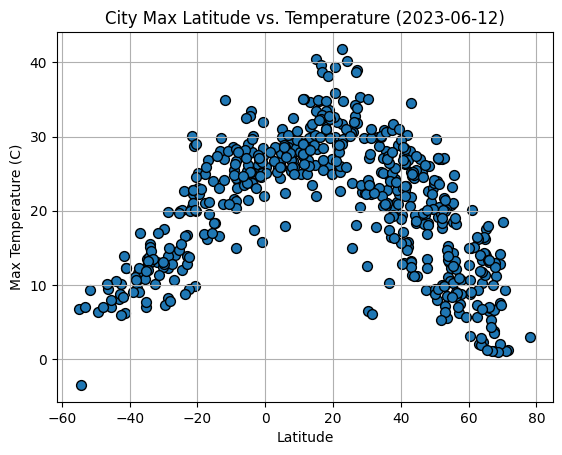

In [8]:
#format the max date in the dataset as "runDate" for graph titles
endrundate = city_data_df["Date"].max()
rundate = datetime.utcfromtimestamp(endrundate).strftime('%Y-%m-%d')
# Build scatter plot for latitude vs. temperature with graph properties
city_data_df.plot(x = 'Lat',y= 'Max Temp',kind = 'scatter',
                  grid = True,xlabel= "Latitude",ylabel = "Max Temperature (C)",
                  title = f"City Max Latitude vs. Temperature ({rundate})",edgecolors='black',s = 50
                  )

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Highest temperature is found at 0 latitude or equator and as the latidude increases or decreases, temperature drops.

#### Latitude Vs. Humidity

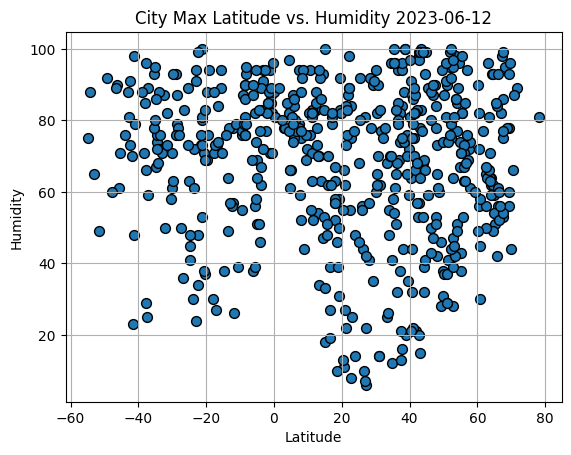

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x = 'Lat',y= 'Humidity',kind = 'scatter',
                  grid = True,xlabel= "Latitude",ylabel = "Humidity",
                  title = f"City Max Latitude vs. Humidity {(rundate)}",edgecolors='black',s = 50
                  )

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Polar regions have lower humidity and as latitude gets higher,humidity gets higher in Northern hemisphere.

#### Latitude Vs. Cloudiness

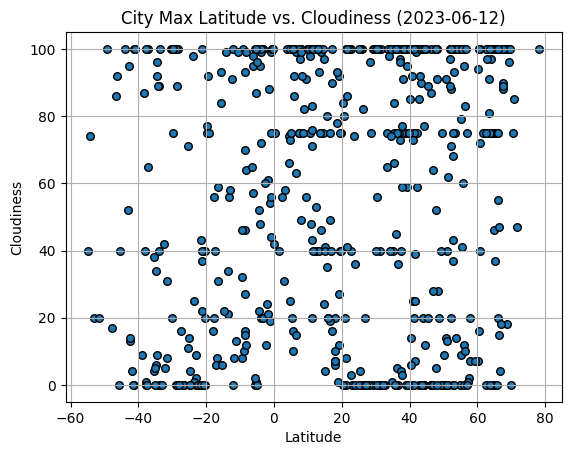

In [10]:

city_data_df.plot(x = 'Lat',y= 'Cloudiness',kind = 'scatter',
                  grid = True,xlabel= "Latitude",ylabel = "Cloudiness",
                  title = f"City Max Latitude vs. Cloudiness ({rundate})",edgecolors='black',s = 30
                  )

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Cloudiness data is widely spread across the latitude.

#### Latitude vs. Wind Speed Plot

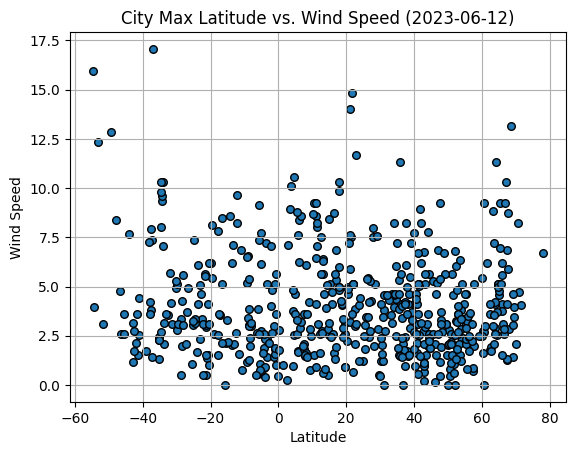

In [11]:
# Build the scatter plots for latitude vs. wind speed

city_data_df.plot(x = 'Lat',y= 'Wind Speed',kind = 'scatter',
                  grid = True,xlabel= "Latitude",ylabel = "Wind Speed",
                  title = f"City Max Latitude vs. Wind Speed ({rundate})",edgecolors='black',s = 30
                  )


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,tiksi,71.6872,128.8694,1.23,89,47,4.04,RU,1686594165
6,ouagadougou,12.3642,-1.5383,26.07,83,40,2.57,BF,1686594745
7,enriquillo,17.9000,-71.2333,30.82,63,7,6.01,DO,1686594745
8,dudinka,69.4058,86.1778,7.57,78,96,3.94,RU,1686594746
9,hilo,19.7297,-155.0900,26.82,82,75,3.13,US,1686594543


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.99,63,14,3.03,PN,1686594162
1,nabire,-3.3667,135.4833,24.44,94,100,1.41,ID,1686594203
2,ushuaia,-54.8000,-68.3000,6.79,75,40,15.95,AR,1686593890
3,grytviken,-54.2811,-36.5092,-3.49,88,74,3.95,GS,1686594159
4,port mathurin,-19.6833,63.4167,25.07,69,77,8.10,MU,1686594745


###  Temperature vs. Latitude Linear Regression Plot

In [14]:

# Define function for creating linear agression and scatter plot
def linear_regression_plot(x,y,x_cord,y_cord,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(f'{y_label}')
    plt.grid()
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(x_cord,y_cord),fontsize=12,color="red")
   
    

The r-square is -0.7528975763927336
y = -0.35x + 34.64


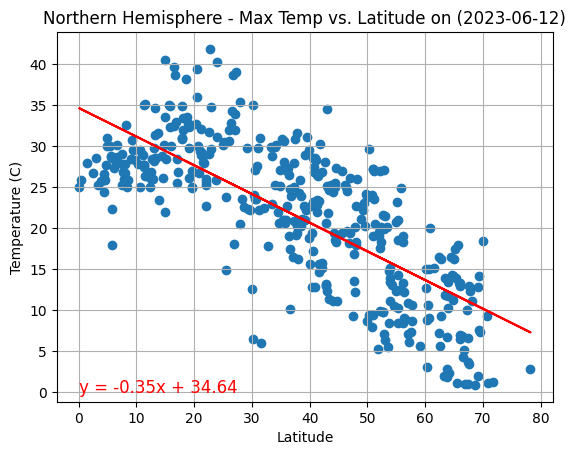

In [15]:
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
y_label = "Temperature (C)"
x_cord = 0
y_cord = 0
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude on ({rundate})")
plt.show()


The r-square is 0.8487349719687679
y = 0.45x + 28.26


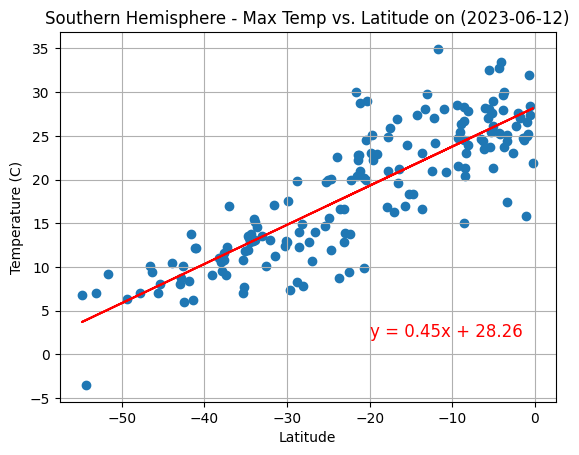

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
y_label = "Temperature (C)"
x_cord = -20
y_cord = 2
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude on ({rundate})")
plt.show()

**Discussion:** The result reveals a strong correlation between distance from the equator temperature. The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.004700131327849539
y = 0.01x + 66.8


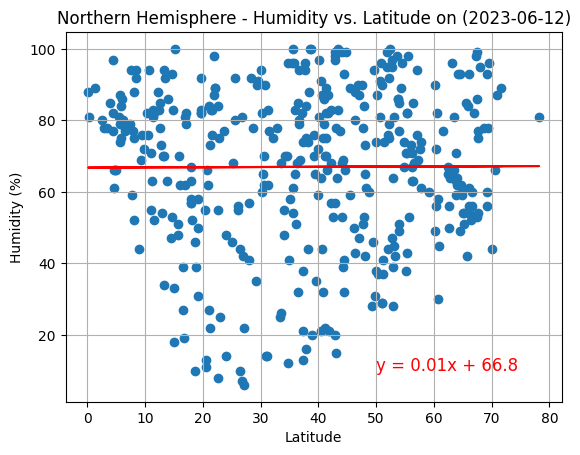

In [17]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
y_label = "Humidity (%)"
x_cord = 50
y_cord = 10
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Northern Hemisphere - Humidity vs. Latitude on ({rundate})")
plt.show()

The r-square is 0.05935933630345545
y = 0.08x + 73.7


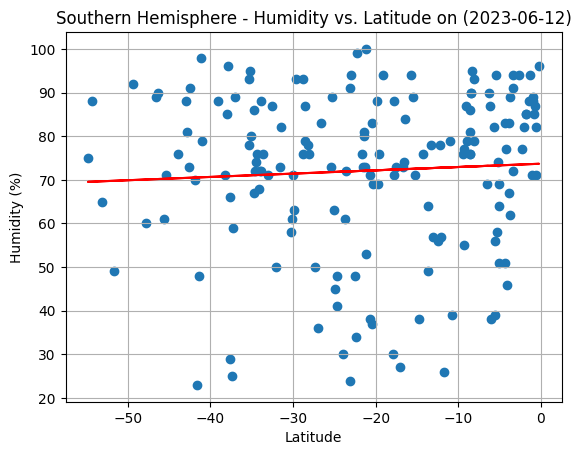

In [18]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
y_label = "Humidity (%)"
x_cord = 20
y_cord = -50
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Southern Hemisphere - Humidity vs. Latitude on ({rundate})")
plt.show()

**Discussion:** Both in the Northern and Southern hemisphere, there is a weak negative correlation between Humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.007777755392026536
y = 0.02x + 58.93


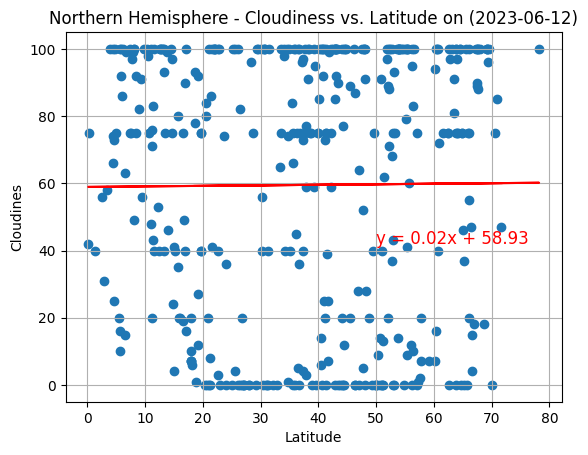

In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
y_label = "Cloudines"
x_cord = 50
y_cord = 42
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude on ({rundate})")
plt.show()

The r-square is 0.14394603376351697
y = 0.39x + 54.07


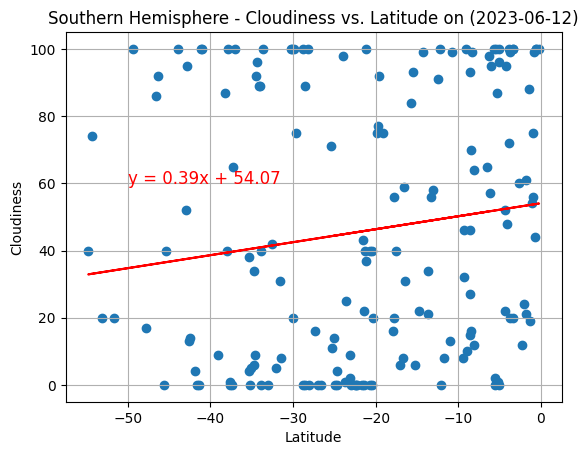

In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
x_cord = -50
y_cord = 60
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude on ({rundate})")
plt.show()

**Discussion:** Both in the Northern and Southern hemisphere, there is a weak negative correlation between cloud cover and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is -0.08212664247023804
y = -0.01x + 4.3


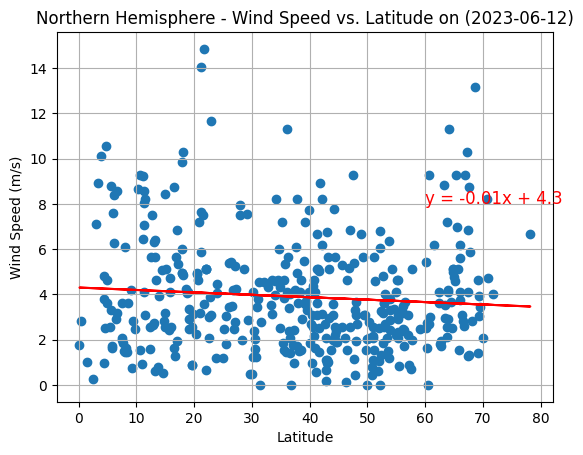

In [21]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
y_label = "Wind Speed (m/s)"
x_cord = 60
y_cord = 8
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude on ({rundate})")
plt.show()

The r-square is -0.2830932022619952
y = -0.06x + 2.82


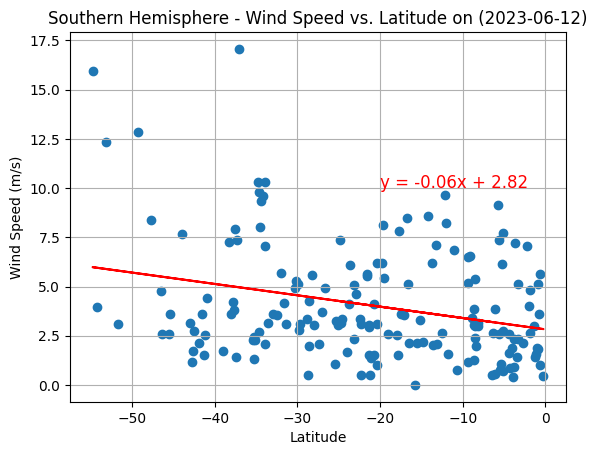

In [22]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
y_label = "Wind Speed (m/s)"
x_cord = -20
y_cord = 10
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude on ({rundate})")
plt.show()

**Discussion:** There is a weak relationship between wind speed and latitude in both hemispheres, but in the northern hemisphere there is a positive correlation where as in the southern it is a negative correlation. 